<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [4]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from scipy.stats import t

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [6]:
sat_scores = pd.read_csv('./sat_scores.csv')
sat = './sat_scores.csv'

In [7]:
#converted dataframe into a dictionary with .to_dict
data= sat_scores.to_dict('list')
data

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  56

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [8]:
sat_scores = pd.read_csv(sat)

In [9]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
dict_df=pd.DataFrame(data)

In [11]:
dict_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [12]:
sat_scores[['Rate','Verbal','Math']].astype(float, inplace=True).head(2)

,Rate,Verbal,Math
0,82.0,509.0,510.0
1,81.0,499.0,513.0


#### If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
#first 10 rows of the dataframe
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [11]:
sat_scores.describe()
sat_scores.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

# Answer # Data dictionary: 
#### This dataset contains information about sat scores for states in the USA, this data consists of 52 rows and 4 columns.
#### State: State where the test was held;
#### Rate: How many students participated in the test;
#### Verbal: The average verbal score for each state;
#### Math: The average math score for each state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

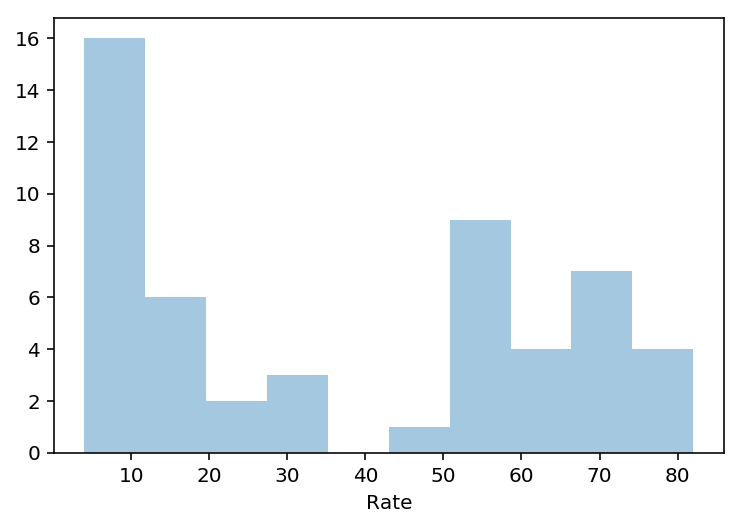

In [13]:
import seaborn as sns
r=sat_scores['Rate']
rate_plot = sns.distplot(r, kde=False, bins=10)

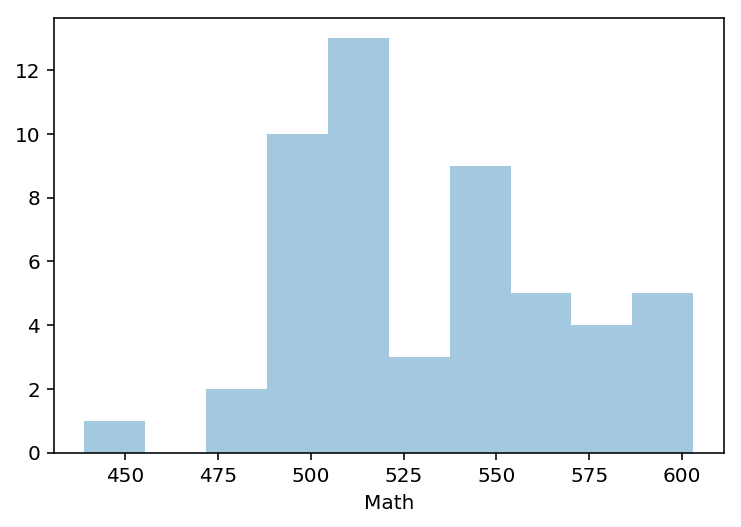

In [13]:
m= sat_scores['Math']
math_plot = sns.distplot(m, kde=False, bins=10)
#This graph shows only a fraction of people score less than 475 and majority are centrally located

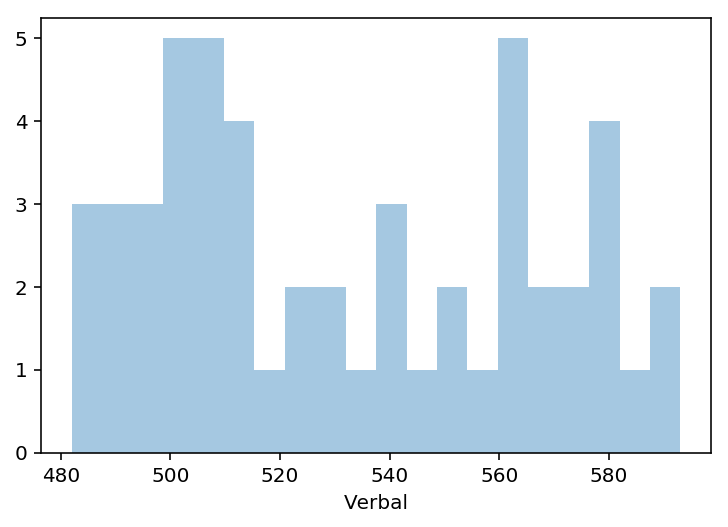

In [14]:
v=sat_scores['Verbal']
verbal_plot= sns.distplot(v, kde=False, bins =20)
#Scores for this graph are varied

### These histograms show us the distribution of scores of each test

In [15]:
#There are many peaks in this graph
#these graphs do not convey that the results are normaly distributed

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [16]:
score_plot = sat_scores.drop(columns = ['State'])
#dropped state column for the pairplot purpose only and assigned the new df to score plot variable

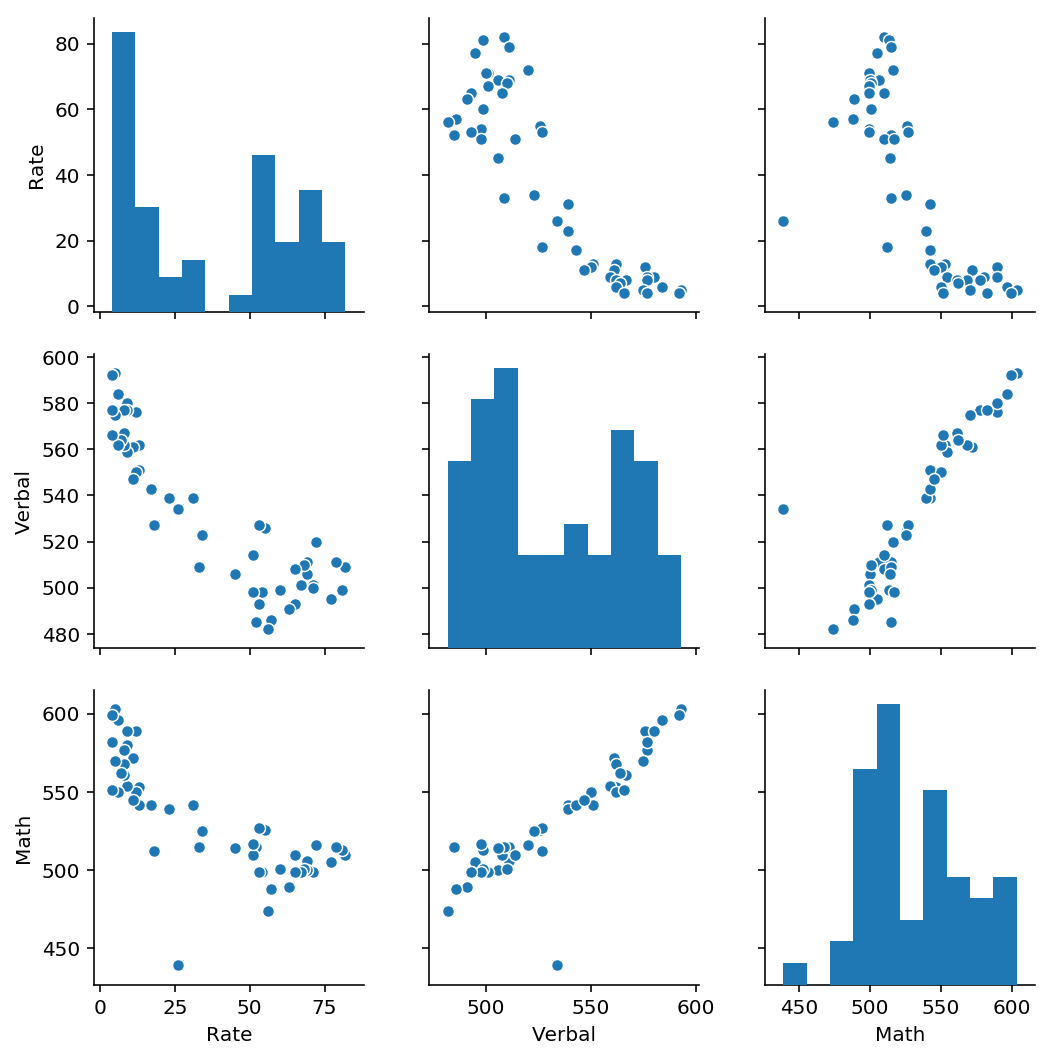

In [17]:
pair_plot = sns.pairplot(score_plot)
#pairplot quickly summarises all the numerical variables; from the plot it can be seen that Rate is negatively correlated 
#with both Math and Verbal; And Verbal and Math are positively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

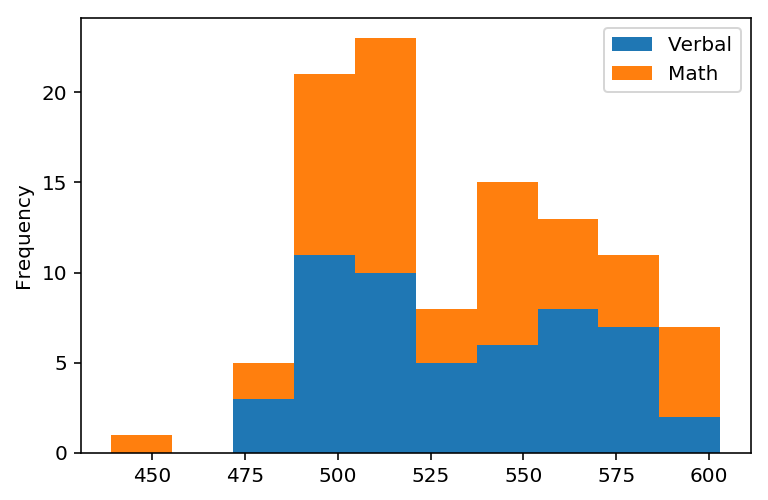

In [18]:
sat_scores[['Verbal','Math']].plot(kind='hist',stacked=True);
#non-symmetric distribution

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

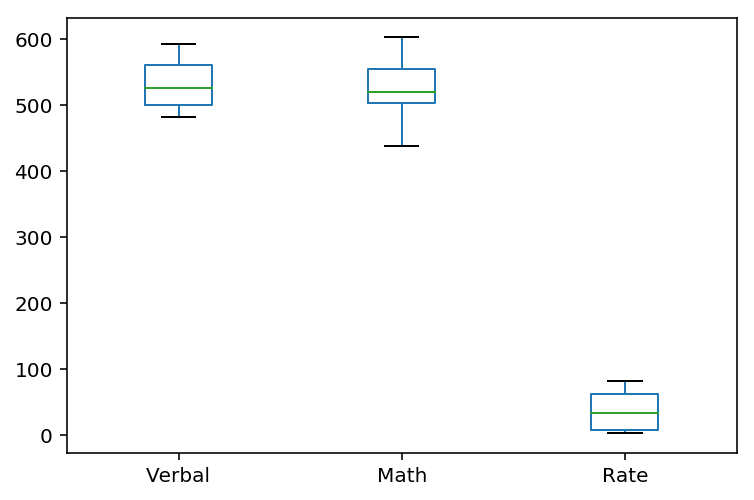

In [19]:
sat_scores[['Verbal', 'Math', 'Rate']].plot(kind='box');
#Boxplot shows a range of things in one simple plot, median-IQR
#plotting Rate boxplot on the same chart increases the range of Y-axis

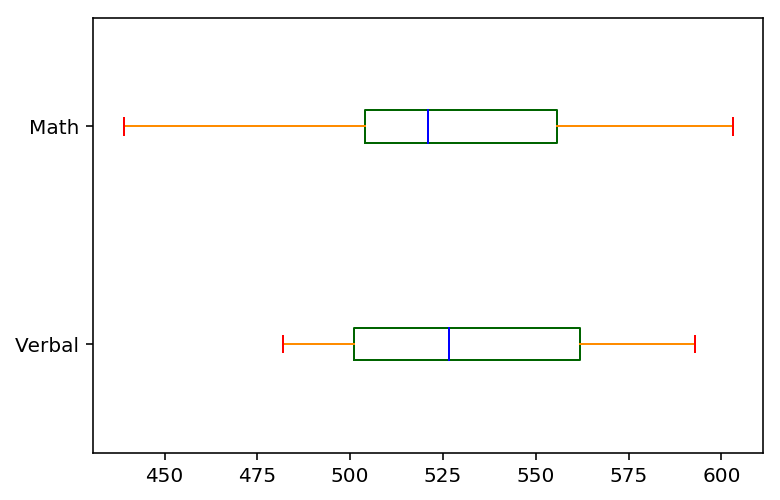

In [20]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'Blue', 'caps': 'Red'}
sat_scores[['Verbal', 'Math']].plot(kind='box',color=color,vert=False);
#Here, we can see that verbal box plot is slightly positively skewed and there is more variance in math variable
#boxplot shows median, IQrange, max and min values and any outliers if present

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [23]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.mean()].shape

(24, 4)

In [24]:
#24 states verbal score is above the mean & 28 are lower than mean. The results tell us that the distribution
#is slightly skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [26]:
sat_scores[sat_scores['Verbal'] > sat_scores.Verbal.median()].shape

(26, 4)

In [27]:
#median verbal score are 2 higher than mean score. The mean and median are only 2 points apart which could indicate a 
#symmetrical shape in other words normal distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [28]:
sat_scores['Verbal - Math']=(sat_scores.Verbal- sat_scores.Math)

In [29]:
sat_scores.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [30]:
df=sat_scores.sort_values(['Verbal - Math'], ascending=False)
df.reset_index(inplace=True)
#sorting new dataframe by verbal and math diff, and reseting the index

In [31]:
df1=df.loc[:9]
df1
#df1 is a new dataframe with top 10 states with highest differnce in math and verbal scores

,index,State,Rate,Verbal,Math,Verbal - Math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15
3,45,AR,6,562,550,12
4,32,NM,13,551,542,9
5,31,TN,13,562,553,9
6,9,VA,68,510,501,9
7,16,DC,56,482,474,8
8,8,ME,69,506,500,6
9,41,OK,8,567,561,6


In [32]:
df_2= sat_scores.sort_values(['Verbal - Math'])
df_2.reset_index(inplace=True)
#sorting new dataframe by verbal and math diff, and reseting the index

In [33]:
#df2 is a new dataframe with top 10 states with highest differnce in math and verbal scores
df2 = df_2[:9]
df2

,index,State,Rate,Verbal,Math,Verbal - Math
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14
3,33,IL,12,576,589,-13
4,44,WI,6,584,596,-12
5,36,MI,11,561,572,-11
6,3,NY,77,495,505,-10
7,47,IA,5,593,603,-10
8,37,MN,9,580,589,-9


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [34]:
sat_scores.corr()
#This correlation matrix tells me that verbal and rate have strong negative correlation
#whereas math and verbal have similar amount of strong positive correlation
#difference between verbal and math is no more than weakly correlated to any variable.

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [35]:
sat_scores.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### ANS:
##### Count= The number of rows in the dataframe
##### Mean = Mean of all the values in each column
##### std= The standard deviation of each column
##### min = The minimum value present in that column
##### 25%= median value of first 25% of the data
##### 50%= median value
##### 75%= median value of last 755 of the data
##### max= The maximum value present in each column

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [36]:
drug =pd.read_csv('./drug-use-by-age.csv')
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [37]:
drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [38]:
drug.drop(['n'], axis=1, inplace=True)
drug.head()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0


In [40]:
drug.dtypes

age                         object
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [41]:
drug.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [42]:
#Defined a function to strip - from the age range and return an average instead.
def convert_age(age):
    try:
        return float(age)
    except:
        if '-' in age:
            ages = age.split('-')
            return (float(ages[0]) + float(ages[1])) / 2
        else:
            return float(age.strip('+'))

In [43]:
drug['age'] = drug['age'].map(convert_age)

In [44]:
#To convert column cocaine frequency into float and remove any characters from the cells'

In [45]:
drug['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [46]:
def convert_object_to_float(number):
    try:
        return float(number)
    except:
        if '-' in number:
            return np.nan

In [47]:
drug['cocaine-frequency'] = drug['cocaine-frequency'].map(convert_object_to_float)

In [48]:
#above function has been applied to all the other columns with unwanted characters and to conver to a float

In [49]:
drug['crack-frequency'] = drug['crack-frequency'].map(convert_object_to_float)

In [50]:
drug['oxycontin-frequency'] = drug['oxycontin-frequency'].map(convert_object_to_float)

In [51]:
drug['heroin-frequency'] = drug['heroin-frequency'].map(convert_object_to_float)

In [52]:
drug['inhalant-frequency'] = drug['inhalant-frequency'].map(convert_object_to_float)

In [53]:
drug['meth-frequency']= drug['meth-frequency'].map(convert_object_to_float)

In [54]:
drug.info()
#all the columns are now in float format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 27 columns):
age                        17 non-null float64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        16 non-null float64
tran

In [55]:
drug.head(2)

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [56]:
correlation_df = drug.corr()
drug.corr()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,1.000000,0.367742,0.642166,-0.380299,0.311873,-0.186837,0.894474,0.148656,0.882662,-0.200053,...,-0.388914,-0.034585,-0.254427,-0.312268,-0.407329,0.703686,-0.268959,0.323933,-0.364657,0.445154
alcohol-use,0.367742,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.642166,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.380299,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.311873,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.186837,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.894474,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.148656,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.882662,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,-0.200053,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


In [57]:
drug_df = drug.set_index('age')

Text(0.5, 1.0, 'Alcohol & Marijuana in different age groups')

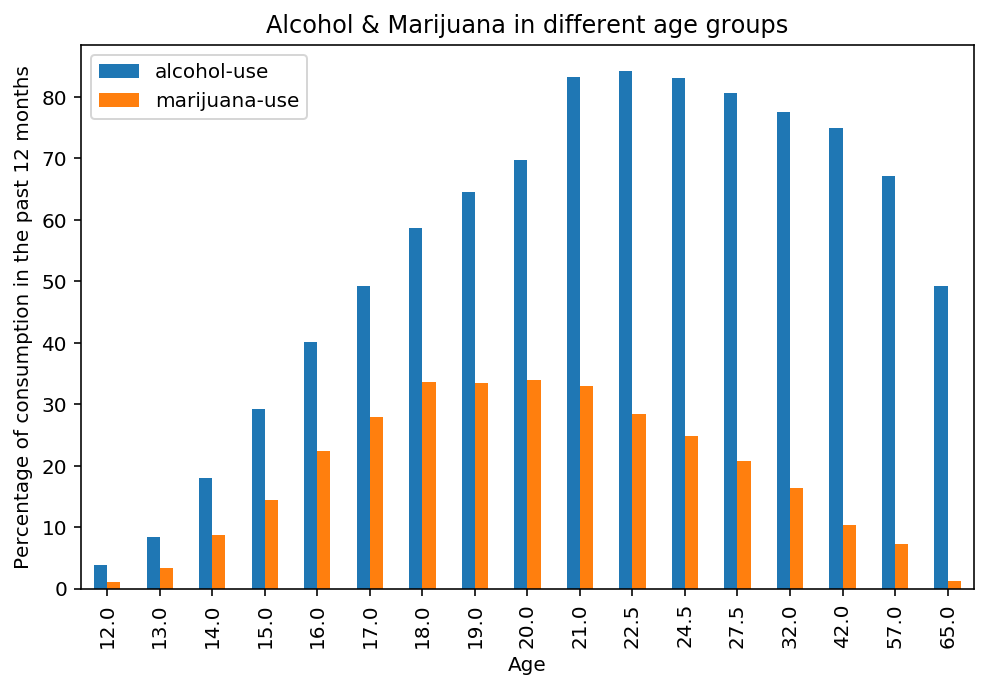

In [58]:
dp = drug_df[['alcohol-use','marijuana-use']].plot(figsize=(8,5), kind='bar')
dp.set_xlabel('Age')
dp.set_ylabel('Percentage of consumption in the past 12 months')
dp.set_title('Alcohol & Marijuana in different age groups')

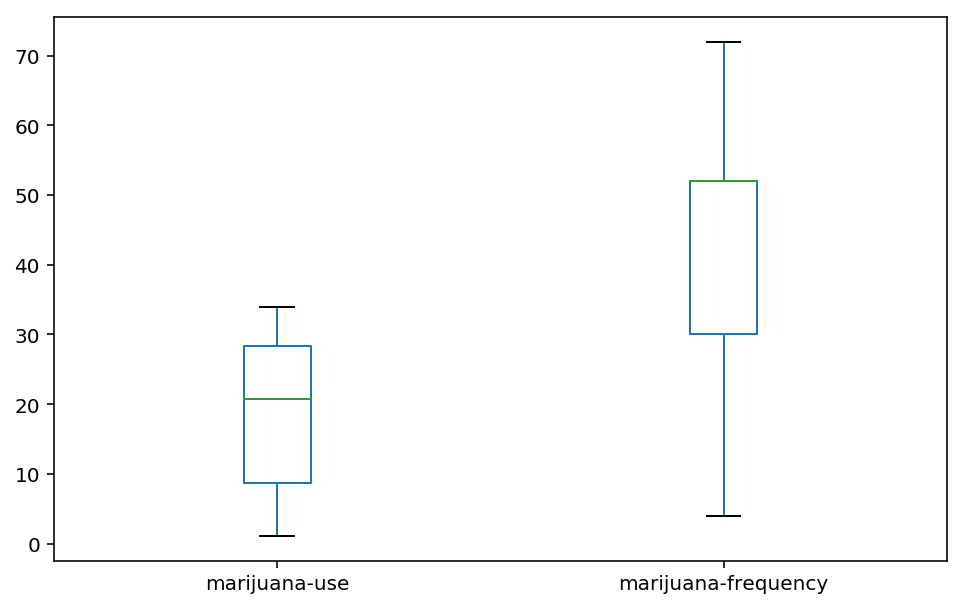

In [59]:
drug_df[['marijuana-use','marijuana-frequency']].plot(kind='box',figsize=(8,5));
#from the plot we can tell that marijuana frquency has a bigger range then marijuana-use
#the result are skewed however marijuana-use is very close to normal distrbution

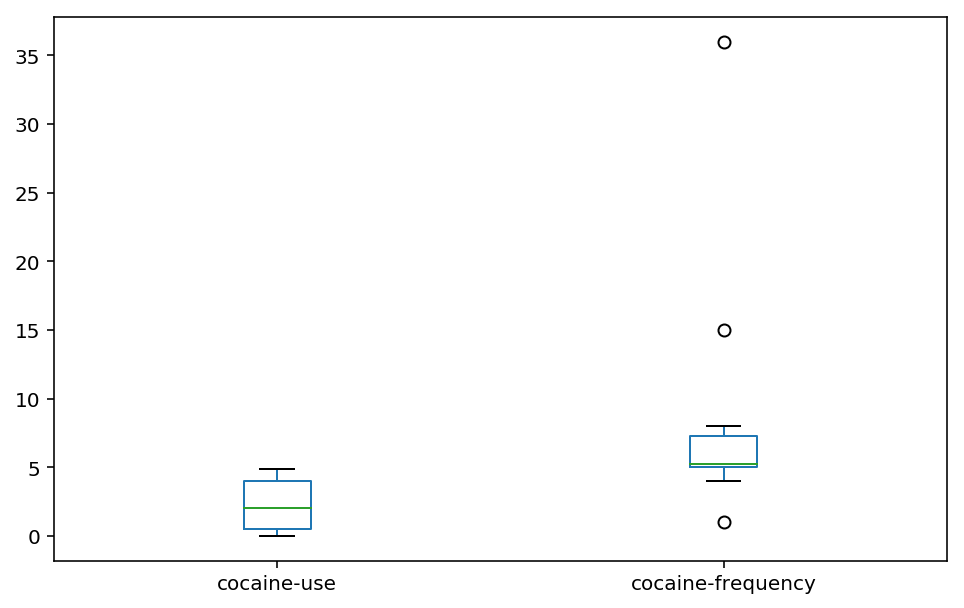

In [60]:
drug_df[['cocaine-use','cocaine-frequency']].plot(kind='box',figsize=(8,5))

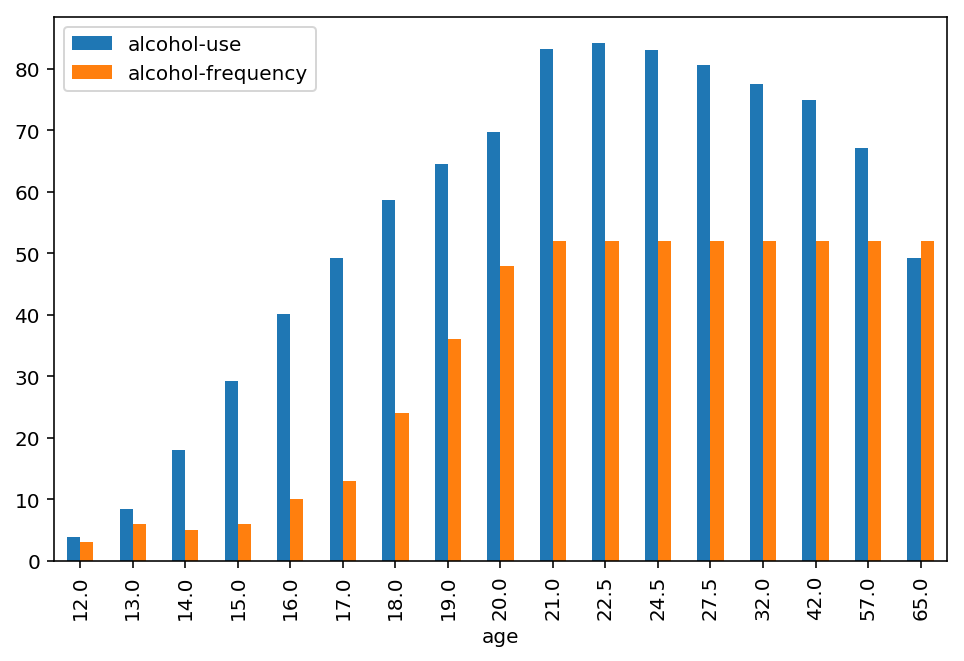

In [61]:
drug_df[['alcohol-use','alcohol-frequency']].plot(figsize=(8,5), kind='bar')

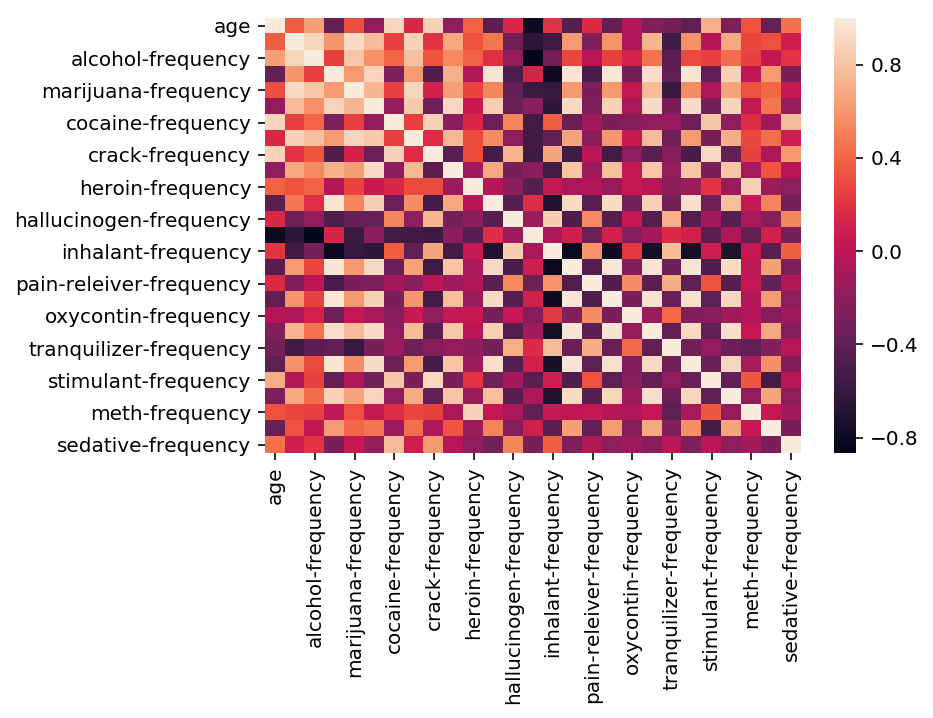

In [62]:
sns.heatmap(correlation_df)

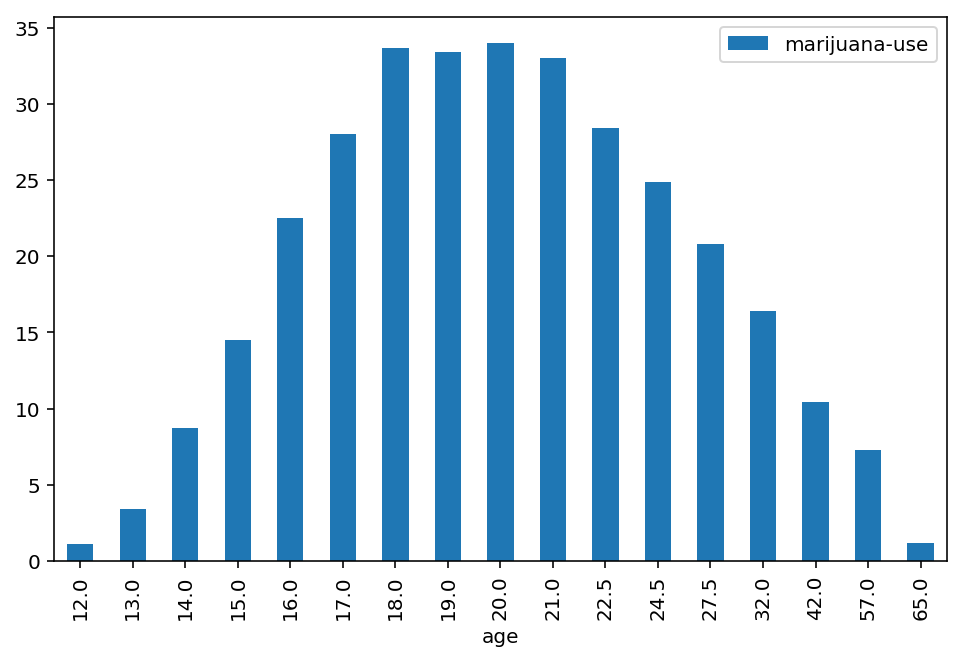

In [63]:
drug_df[['marijuana-use']].plot(figsize=(8,5), kind='bar');

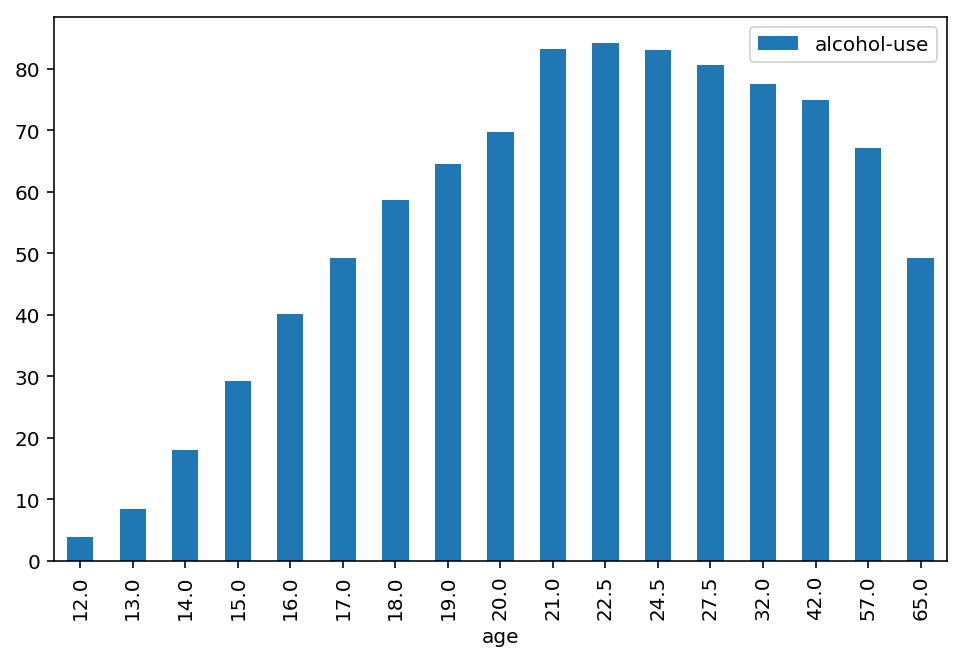

In [64]:
drug_df[['alcohol-use']].plot(figsize=(8,5), kind='bar');

In [65]:
#For this sample, the marijuana-use with age seems to be normaly distributed. Whereas alcohol use seems
#to be skewedbut to further our understanding
#we will do a hypothesis testing to prove if the population mean are same for both groups

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [66]:
#defining our variables
marijuana= drug['marijuana-use']
alcohol = drug['alcohol-use']

In [67]:
# 1. State the hypothesis
#H0 : mean of marijuana-use = mean of alochol-use
#H1 : mean of marijuana-use != mean of alcohol-use

In [68]:
print(stats.levene(marijuana, alcohol))
#Since p value for variance is significant, we will use Welchs Ttest
#for unequal variance

LeveneResult(statistic=5.80623603836985, pvalue=0.02189549176265699)


In [69]:
#2. Set an alpha value = 0.05
alpha = 0.05

In [70]:
#3. point-estimate
mean1 = np.mean(marijuana)
mean2 = np.mean(alcohol)

In [71]:
## Step 4: Calculate test statistic.
t_stat= stats.ttest_ind(marijuana, alcohol, equal_var = False)
print(t_stat)

Ttest_indResult(statistic=-5.116246810580653, pvalue=3.927395022665128e-05)


In [72]:
p_value = t_stat.pvalue
print(p_value)
'{:f}'.format(p_value)

3.927395022665128e-05


'0.000039'

In [73]:
if p_value < alpha:
    #We reject our null hypothesis and conclude that 
    print("The true mean marijuana-use value is different from the true mean value of alcohol-use. We reject our null hypothesis")
elif p_value > alpha:
    #We fail to reject our null hypothesis and
    print("We cannot conclude that the true mean marijuana-use is different from the mean alcohol-value.")
else:
    print("Our test is inconclusive.")

The true mean marijuana-use value is different from the true mean value of alcohol-use. We reject our null hypothesis


**Report**
-->We have used an independent T-test to determine if theres a significant difference between means of two independent sample groups.
--> We assume the samples were randomly selected and the distribution should follow normal distibuiton as per the central limit theorem.
--> there is a difference in variance between two groups so we should use Welch's t-test
--> To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.
--> We are setting our confidence intrval at 95%, aplha is 0.05
-->From the P-value we can say that it is significant and therfore we reject our null hypothesis. The difference in mean for both groups is significantly different as per our p-value =0.000039